In [55]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

Now, I will shift my focus to the grades and scoring of each restaurant. Through this analysis, I hope to explore the counts of different letter grades and distribution of scores for restaurants, separated by borough. It is worth it to remember that scores are numeric, and grades reflect the scores. The final score is an accumulation of the sum of the points, and thus a letter grade is assigned. Restaurants with scores of 0-13 points are given an A, 14-27 points are given a B, and 28+ points are given a C. 

I predict that graded restaurants will have scores that reflect predominantly be A's and B's, as restaurants who have lower scores/grades will likely bring their case to trials with the Health Department and will therefore have no grade assigned. Let's see if my hypothesis is correct!  

In [13]:
#Recall the DataFrame from first Notebook - Initial Exploration into Dataset
%store -r restaurant_df
restaurant_df

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,ACTION,VIOLATION,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,INSPECTION_TYPE
0,STARBUCKS,Manhattan,78,SPRING STREET,10012.0,Café/Coffee/Tea,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,9.0,A,Cycle Inspection / Initial Inspection
1,110 KENNEDY FRIED CHICKEN,Staten Island,110,VICTORY BOULEVARD,10301.0,Chicken,Establishment Closed by DOHMH. Violations wer...,02C,Hot food item that has been cooked and refrige...,Y,39.0,NaN,Pre-permit (Operational) / Initial Inspection
2,HQ CLUB,Manhattan,552,WEST 38 STREET,10018.0,American,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,13.0,A,Cycle Inspection / Initial Inspection
3,RESTAURANT TATIANA,Brooklyn,3152,BRIGHTON 6 STREET,11235.0,Russian,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12.0,A,Cycle Inspection / Re-inspection
4,KO SUSHI,Manhattan,1329,2 AVENUE,10021.0,Japanese,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,7.0,NaN,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316930,SPRING HILL HOTEL,Manhattan,25,WEST 37 STREET,10018.0,Continental,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,20.0,NaN,Cycle Inspection / Initial Inspection
316931,PARIS BAGUETTE,Manhattan,591,LEXINGTON AVENUE,10022.0,Bakery,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,35.0,NaN,Cycle Inspection / Initial Inspection
316932,VESUVIO RESTAURANT & PIZZA,Brooklyn,7303,3 AVENUE,11209.0,Pizza/Italian,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,18.0,B,Cycle Inspection / Re-inspection
316933,ROSEBANK PIZZA,Staten Island,1372,BAY STREET,10305.0,Pizza/Italian,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Y,12.0,A,Cycle Inspection / Re-inspection


In [14]:
#check that this dataset is the cleaned version with non-negative scores
restaurant_df.describe()

,ZIPCODE,SCORE
count,314768.000000,304356.000000
mean,10542.541316,20.595434
std,564.379829,14.940791
min,10001.000000,0.000000
25%,10018.000000,11.000000
50%,10310.000000,16.000000
75%,11215.000000,26.000000
max,12345.000000,164.000000


In [32]:
#Create new df with score, grade, and critical flag information 
score_df = restaurant_df[['DBA','BORO','SCORE','GRADE','CRITICAL_FLAG']]

In [33]:
score_df

,DBA,BORO,SCORE,GRADE,CRITICAL_FLAG
0,STARBUCKS,Manhattan,9.0,A,N
1,110 KENNEDY FRIED CHICKEN,Staten Island,39.0,NaN,Y
2,HQ CLUB,Manhattan,13.0,A,Y
3,RESTAURANT TATIANA,Brooklyn,12.0,A,N
4,KO SUSHI,Manhattan,7.0,NaN,N
...,...,...,...,...,...
316930,SPRING HILL HOTEL,Manhattan,20.0,NaN,Y
316931,PARIS BAGUETTE,Manhattan,35.0,NaN,Y
316932,VESUVIO RESTAURANT & PIZZA,Brooklyn,18.0,B,Y
316933,ROSEBANK PIZZA,Staten Island,12.0,A,Y


In [18]:
score_df.describe()

,SCORE
count,304356.000000
mean,20.595434
std,14.940791
min,0.000000
25%,11.000000
50%,16.000000
75%,26.000000
max,164.000000


In [17]:
#Store the df 
%store score_df

Stored 'score_df' (DataFrame)


There are many restaurants with null values for the grade. I will not be removing rows with NaN letter grades because restaurants who dispute their letter grade will show Nan, despite having a valid score. Since I will be analyzing the distribution of numeric scores for each borough, I want to look at rows where there are scores of 0. 

In [64]:
score_df[score_df['SCORE'] == 0]


,DBA,BORO,SCORE,GRADE,CRITICAL_FLAG
555,LATIN SOCIAL COCINA-BAR,Manhattan,0.0,P,NaN
692,PETROSSIAN BOUTIQUE & CAFE,Manhattan,0.0,A,NaN
894,PATTIE SHAKE,Bronx,0.0,NaN,NaN
1207,FRENCHETTE,Manhattan,0.0,NaN,NaN
1371,XI'AN FAMOUS FOODS,Queens,0.0,P,NaN
...,...,...,...,...,...
315714,D'ANGEL BILLIARDS,Bronx,0.0,NaN,NaN
315759,PANCHO'S SPORT COFFEE SHOP,Bronx,0.0,NaN,NaN
315774,EL REY V,Brooklyn,0.0,NaN,NaN
316081,BOMBAY CHOWK,Manhattan,0.0,NaN,NaN


In [27]:
score_df.SCORE.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
316930    False
316931    False
316932    False
316933    False
316934    False
Name: SCORE, Length: 316818, dtype: bool

Based on the error and the isnull statement, there seems to be no null values/no values with zero. I will not change the dataframe.

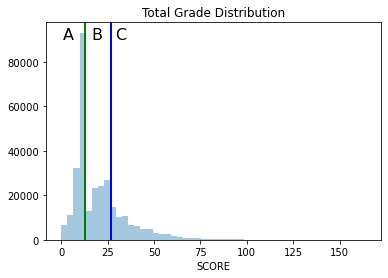

In [129]:
#Histogram of restaurant scores 
score_hist = sns.distplot(score_df.SCORE, kde=False)
#A's
plt.axvline(x=13,linewidth=2,color='green')
#B's
plt.axvline(x=27,linewidth=2,color='blue')

plt.text(1,90000,'A',fontsize=16)
plt.text(16,90000,'B',fontsize=16)
plt.text(29,90000,'C',fontsize=16)

plt.title('Total Grade Distribution')

plt.savefig('score_hist.png')

In [135]:
#Histogram of Restaurant Scores separated by borough

#define a function to plot multiple histograms 

boroughs = ['Manhattan','Brooklyn','Queens', 'Staten Island', 'Bronx']

def histogram_by_borough(df,features,rows,cols): 
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1) # i+1 as a counter 
        
        #set ylimit and xlimit 
        axes = plt.gca()
        axes.set_xlim([0,120])
        axes.set_ylim([0,35000])
        
        score_df[score_df['BORO'] == feature].hist(ax=ax, color='lightblue',bins=40) #indexes where boolean is True 
        ax.set_title(feature+" Grade Distribution") 
        ax.set_xlabel("SCORE")
        # Hide grid lines
        ax.grid(False)
        
        #vertical line for A cutoff
        plt.axvline(x=13,linewidth=2,color='green')
        #vertical line for B cutoff 
        plt.axvline(x=27,linewidth=2,color='blue')
        
        #add text for A, B, C
        plt.text(5,30000,'A',fontsize=16,color='red')
        plt.text(16,30000,'B',fontsize=16,color='red')
        plt.text(29,30000,'C',fontsize=16,color='red')
        
    fig.tight_layout() #adjust spacing between subplots
    plt.show()
    return fig 

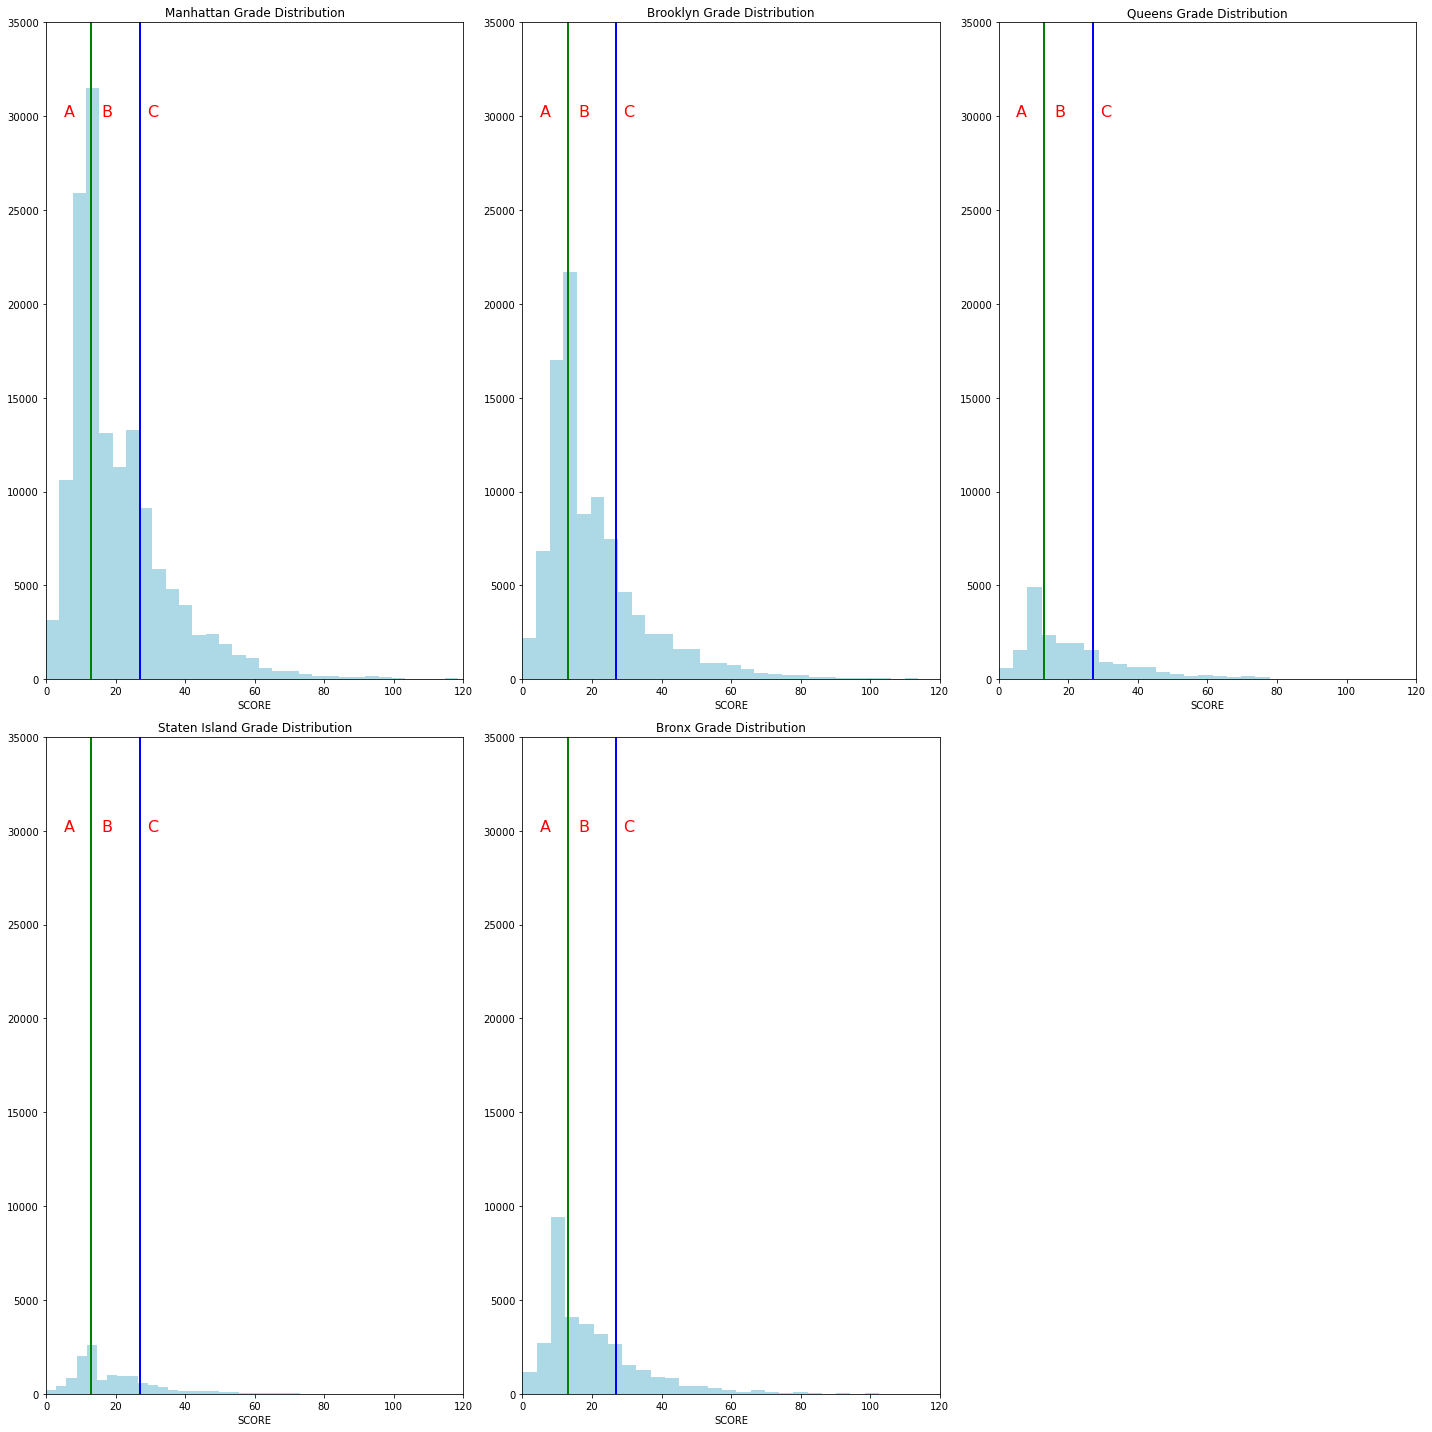

In [136]:
#call function, pass dataframe, boroughs, row and column number as arguments 
fig = histogram_by_borough(score_df,boroughs,2,3)
fig.savefig('score_hist_5boroughs.png')